# T-GCN  model

We start with the baseline model (GCN and GRU) and try it to show how prediction works.


Main idea of T-GCN:
On one hand, the graph convolutional network is used to capture the topological structure of the urban road network to obtain the spatial dependence. On the other hand, the gated recurrent unit is used to capture the dynamic variation of traffic information on the roads to obtain the temporal dependence.

### Measures to estimate predictions:
R2 and Var calculate the correlation coefficient, which measures the ability of the prediction result to represent the actual data.


### Plotting the dataset tests 

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Load the dataset
loader = ChickenpoxDatasetLoader()
dataset = loader.get_dataset()

# Extract target values (number of chickenpox cases) over time
targets = [snapshot.y.numpy() for snapshot in dataset]

# Plot the target values over time
plt.figure(figsize=(10, 6))
for i in range(targets[0].shape[0]):  # Iterate over each node
    plt.plot([t[i] for t in targets], label=f'Node {i}')
plt.title("Chickenpox Cases Over Time")
plt.xlabel("Time Step")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

# Visualize the graph structure for a specific snapshot (e.g., the first snapshot)
snapshot = dataset[0]

# Convert the PyTorch Geometric graph to a NetworkX graph
G = to_networkx(snapshot, to_undirected=True)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Graph Structure at Time Step 0")
plt.show()

In [3]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.5.1-cp311-cp311-win_amd64.whl.metadata (28 kB)
Using cached torch-2.5.1-cp311-cp311-win_amd64.whl (203.1 MB)


In [ ]:
# Import necessary libraries
import torch
import torch.nn.functional as F

In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
    
    

In [8]:
!pip install torch

In [9]:
!pip install torch-geometric

  Obtaining dependency information for torch-geometric from https://files.pythonhosted.org/packages/03/9f/157e913626c1acfb3b19ce000b1a6e4e4fb177c0bc0ea0c67ca5bd714b5a/torch_geometric-2.6.1-py3-none-any.whl.metadata
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [11]:
!pip install torch-geometric-temporal

  Using cached torch_geometric_temporal-0.54.0-py3-none-any.whl
  Obtaining dependency information for decorator==4.4.2 from https://files.pythonhosted.org/packages/ed/1b/72a1821152d07cf1d8b6fce298aeb06a7eb90f4d6d41acec9861e7cc6df0/decorator-4.4.2-py2.py3-none-any.whl.metadata
  Using cached decorator-4.4.2-py2.py3-none-any.whl.metadata (4.2 kB)
  Obtaining dependency information for cython from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached pandas-1.3.5.tar.gz (4.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Prepari

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2468 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-311\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-311\pandas
  creating build\lib.win-amd64-cpython-311\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-311\pandas\api
  creating build\lib.win-amd64-cpython-311\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-311\pandas\arrays
  creating build\lib.win-amd64-cpython-311\pand

  Using cached torch_geometric_temporal-0.54.0-py3-none-any.whl
  Obtaining dependency information for decorator==4.4.2 from https://files.pythonhosted.org/packages/ed/1b/72a1821152d07cf1d8b6fce298aeb06a7eb90f4d6d41acec9861e7cc6df0/decorator-4.4.2-py2.py3-none-any.whl.metadata
  Using cached decorator-4.4.2-py2.py3-none-any.whl.metadata (4.2 kB)
  Obtaining dependency information for cython from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached pandas-1.3.5.tar.gz (4.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Prepari

In [ ]:

from torch_geometric_temporal.nn.recurrent import TGCN  # Temporal Graph Convolutional Network
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader  # Dataset loader for chickenpox data
from torch_geometric_temporal.signal import temporal_signal_split  # Utility to split temporal signals


# Load the Chickenpox dataset
loader = ChickenpoxDatasetLoader()
dataset = loader.get_dataset()  # Get the dataset

# Split the dataset into training and testing sets
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.2)

# Define a Recurrent Graph Convolutional Network (GCN) model
class RecurrentGCN(torch.nn.Module):

  '''
  first we apply GCN
  then we apply GRU
  '''
    def __init__(self, node_features):
        super(RecurrentGCN, self).__init__()
        # TGCN layer: Temporal Graph Convolutional Network
        self.recurrent = TGCN(node_features, 32)  # Input features, 32 hidden units
        # Linear layer to map hidden state to output
        self.linear = torch.nn.Linear(32, 1)  # 32 hidden units to 1 output unit

    def forward(self, x, edge_index, edge_weight, prev_hidden_state):
        # Apply the TGCN layer
        h = self.recurrent(x, edge_index, edge_weight, prev_hidden_state)
        # Apply ReLU activation
        y = F.relu(h)
        # Apply the linear layer to get the final output
        y = self.linear(y)
        return y, h  # Return output and hidden state

# Initialize the model with 4 input node features
model = RecurrentGCN(node_features=4)

# Define the optimizer (Adam) with a learning rate of 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Set the model to training mode
model.train()

# Training loop
for epoch in tqdm(range(150)):  # 150 epochs
    cost = 0  # Initialize cost for the epoch
    hidden_state = None  # Initialize hidden state
    for time, snapshot in enumerate(train_dataset):  # Iterate over each snapshot in the training dataset
        # Forward pass: compute predictions and hidden state
        y_hat, hidden_state = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr, hidden_state)
        # Compute Mean Squared Error (MSE) loss
        cost = cost + torch.mean((y_hat - snapshot.y) ** 2)
    # Average the cost over all snapshots
    cost = cost / (time + 1)
    # Backpropagation
    cost.backward()
    # Update model parameters
    optimizer.step()
    # Clear gradients
    optimizer.zero_grad()

# Set the model to evaluation mode
model.eval()

# Testing loop
cost = 0  # Initialize cost for testing
hidden_state = None  # Initialize hidden state
for time, snapshot in enumerate(test_dataset):  # Iterate over each snapshot in the testing dataset
    # Forward pass: compute predictions and hidden state
    y_hat, hidden_state = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr, hidden_state)
    # Compute Mean Squared Error (MSE) loss
    cost = cost + torch.mean((y_hat - snapshot.y) ** 2)

# Average the cost over all snapshots
cost = cost / (time + 1)

# Convert cost to a Python float
cost = cost.item()

# Print the Mean Squared Error (MSE) for the test dataset
print("MSE: {:.4f}".format(cost))

## Method DFD - GCN

Building the model

 Fourier Transform

    Time-Shift Problem: The article states that the Time-Shift problem complicates the modeling of spatial dependencies in traffic data. To address this issue, the use of the Fourier Transform is proposed, which converts traffic data into the frequency domain.

    Mathematical Justification:

        Let f(t)f(t) be the traffic data captured by sensors at a specific intersection. If the traffic is delayed by time t0t0​, the data f(t−t0)f(t−t0​) will be captured at the next intersection.

        According to the definition of the Fourier Transform:
$$F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} dt$$

$$F_{t_0}(\omega) = \int_{-\infty}^{\infty} f(t-t_0) e^{-j\omega t} dt$$

## Experiments

 Datasets: Experiments are conducted on four real-world datasets with tens of thousands of time steps and hundreds of sensors. The dataset statistics are presented in Table 1.

## Basic Features and Metrics

  Baselines and Metrics: Classical methods such as HI, GWNet, DCRNN, AGCRN, STGCN, MTGNN, DGCRN are chosen as baselines. Evaluation metrics include Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and Mean Absolute Percentage Error (MAPE).

  Experiment Settings: The datasets are divided into training, validation, and test sets in a 7:1:2 ratio. Traffic data is predicted for 12 time steps using historical data of length 12. The embedding sizes after Fourier Transform and identity are 10, and the time embeddings TtWTtW​ and TtDTtD​ are 12. The embedding size after 1D convolution is 30.

  Experiment Results: DFDGCN shows better results compared to the baselines on all datasets. Ablation analysis confirms the effectiveness of the frequency graph in modeling dynamic spatial dependencies.

In [ ]:
import h5py
import pickle
import folium
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F



In [ ]:

with h5py.File('data/raw_data/PEMS-BAY/PEMS-BAY.h5', 'r') as file:

    axis0 = file['speed']['axis0'][:]               # Идентификаторы датчиков
    block0_items = file['speed']['block0_items'][:] # Идентификаторы датчиков
    axis1 = file['speed']['axis1'][:]               # Метки времени
    timestamps = pd.to_datetime(axis1)              # Преобразование меток времени в формат datetime
    speed_data = file['speed']['block0_values'][:]  # Данные замеров скорости

pems_bay = pd.DataFrame(speed_data, index=timestamps, columns=axis0)

# Открытие .pkl файла
with open('data/raw_data/PEMS-BAY/adj_PEMS-BAY.pkl', 'rb') as file:
    data = pickle.load(file, encoding='bytes')

node_ids = [x.decode('utf-8') for x in data[0]]                             # Получаем список id узлов из data[0]
adj_matrix = data[2]                                                        # Получаем матрицу смежности из data[2]
pems_bay_adj = pd.DataFrame(adj_matrix, index=node_ids, columns=node_ids)   # Создание DataFrame с использованием id узлов как индексов и названий колонок

In [ ]:
print(pems_bay.iloc[:3, :3])

                     400001  400017  400030
Time                                       
2017-01-01 00:00:00    71.4    67.8    70.5
2017-01-01 00:05:00    71.6    67.5    70.6
2017-01-01 00:10:00    71.6    67.6    70.2


In [ ]:
# adj_df.to_csv('data/pems_bay_adj_df.csv')
# pems_bay[:288].to_csv('data/pems_bay_df.csv', index_label='Time')

## Variation of the GCN model 

The variation of the model with embedding additional properties:
- structural
- temporal (time of the day, time of the week) 



In [ ]:
# Параметры
B = 32  # Размер батча
N = 325  # Количество датчиков
L = 12  # Длина временного окна
fft_emb = 10  # Размерность эмбеддинга частотной области
identity_emb = 10  # Размерность эмбеддинга идентичности
T_D_size = 12  # Размерность эмбеддингов времени (например, день недели)
D_W_size = 12  # Размерность эмбеддингов времени (например, час дня)
hidden_emb = 30

# Создание случайных данных для history_data (размер: B, L, N, 1)
history_data = torch.randn(B, N, L, 1)

# Эмбеддинги
Ex1 = torch.randn(L//2 + 1, fft_emb)  # Эмбеддинг частотной области, размер: (L//2+1, fft_emb)
node1 = torch.randn(N, identity_emb)  # Эмбеддинг идентичности, размер: (N, identity_emb)
T_D_emb = torch.randn(B, N, T_D_size)  # Эмбеддинг дня недели, размер: (B, N, T_D_size)
D_W_emb = torch.randn(B, N, D_W_size)  # Эмбеддинг часа дня, размер: (B, N, D_W_size)
Wd = torch.randn(N, fft_emb + identity_emb + L * 2, hidden_emb)
Wxabs = torch.randn(hidden_emb, hidden_emb)

# Логгер для записи в текстовый файл
def log_tensor_size(tensor, description, log_file='tensor_sizes.txt'):
    with open(log_file, 'a', encoding='utf-8') as f:
        f.write(f"{description}: {tensor.shape}\n")

# Преобразование Фурье по оси L (по временным данным)
xn1 = torch.fft.rfft(history_data.squeeze(-1), dim=-1)  # Преобразование Фурье, размер: [B, N, L//2+1]
log_tensor_size(xn1, "После преобразования Фурье xn1")

xn1 = torch.abs(xn1)  # Абсолютное значение
log_tensor_size(xn1, "После применения abs(xn1)")

# Нормализация данных в частотной области
xn1 = F.normalize(xn1, p=2.0, dim=1)  # Нормализация по оси N
log_tensor_size(xn1, "После нормализации по оси N")

xn1 = F.normalize(xn1, p=2.0, dim=2)  # Нормализация по оси L//2+1
log_tensor_size(xn1, "После нормализации по оси L//2+1")

# Перемножение с Ex1 (embedding для частотной области)
xn1 = torch.matmul(xn1, Ex1)  # Размерность: [B, N, fft_emb]
log_tensor_size(xn1, "После перемножения с Ex1")

# Конкатенация с идентичностью и временными эмбеддингами
xn1k = torch.cat([xn1, node1.unsqueeze(0).expand(B, -1, -1)], dim=2)  # Размерность: [B, N, fft_emb + identity_emb]
log_tensor_size(xn1k, "После конкатенации с node1")

x_n1 = torch.cat([xn1k, T_D_emb, D_W_emb], dim=2)  # Размерность: [B, N, fft_emb + identity_emb + T_D_size + D_W_size]
log_tensor_size(x_n1, "После конкатенации с T_D_emb и D_W_emb")

x1 = torch.bmm(x_n1.permute(1,0,2), Wd).permute(1,0,2)
log_tensor_size(x1, "После перемножения с Wd")

# Итоговый размер после конкатенации
log_tensor_size(x1, "Размер после конкатенации всех эмбеддингов")

adp = torch.einsum('bne, ek->bnk', (x1, Wxabs))
log_tensor_size(adp, "Размер после свертки")

adj = torch.bmm(adp, x1.permute(0, 2, 1))
log_tensor_size(adj, "Размер матрицы смежности")



In [ ]:
import numpy as np
import pandas as pd

# adj_df_path = 'data/pems_bay_adj_df.csv'
# data_df_path = 'data/pems_bay_df.csv'

# pems_bay_adj = pd.read_csv(adj_df_path)
# pems_bay = pd.read_csv(data_df_path)

# Convert Time column to datetime for processing
pems_bay["Time"] = pd.to_datetime(pems_bay.index)
pems_bay.set_index("Time", inplace=True)

# 1. Add temporal features
pems_bay["weekday"] = pems_bay.index.weekday  # Day of the week
pems_bay["time_index"] = (pems_bay.index.hour * 12) + (pems_bay.index.minute // 5)  # Time intervals in a day
pems_bay["hour_sin"] = np.sin(2 * np.pi * pems_bay.index.hour / 24)  # Cyclical hour (sin)
pems_bay["hour_cos"] = np.cos(2 * np.pi * pems_bay.index.hour / 24)  # Cyclical hour (cos)

# 2. Add statistical features based on traffic speeds (columns excluding new ones)
speed_columns = pems_bay.columns[:-4]  # Exclude newly added columns
pems_bay["speed_mean"] = pems_bay[speed_columns].mean(axis=1)  # Row-wise mean
pems_bay["speed_std"] = pems_bay[speed_columns].std(axis=1)  # Row-wise std deviation

# 3. Add rate of change (difference) of traffic speeds
pems_bay["speed_diff1"] = pems_bay[speed_columns].diff(periods=1).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff3"] = pems_bay[speed_columns].diff(periods=3).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff6"] = pems_bay[speed_columns].diff(periods=6).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff12"] = pems_bay[speed_columns].diff(periods=12).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff24"] = pems_bay[speed_columns].diff(periods=24).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff288"] = pems_bay[speed_columns].diff(periods=288).mean(axis=1)  # Row-wise average difference

# 4. Add spatially aggregated features using adjacency matrix
adj_matrix = pems_bay_adj.values  # Convert adjacency DataFrame to numpy array
speeds = pems_bay[speed_columns].values  # Extract speed values as numpy array
spatial_avg = adj_matrix @ speeds.T / (adj_matrix.sum(axis=1)[:, None] + 1e-3)  # Weighted average using adjacency
pems_bay["spatial_speed_mean"] = spatial_avg.T.mean(axis=1)  # Average spatial influence per row


<Axes: >

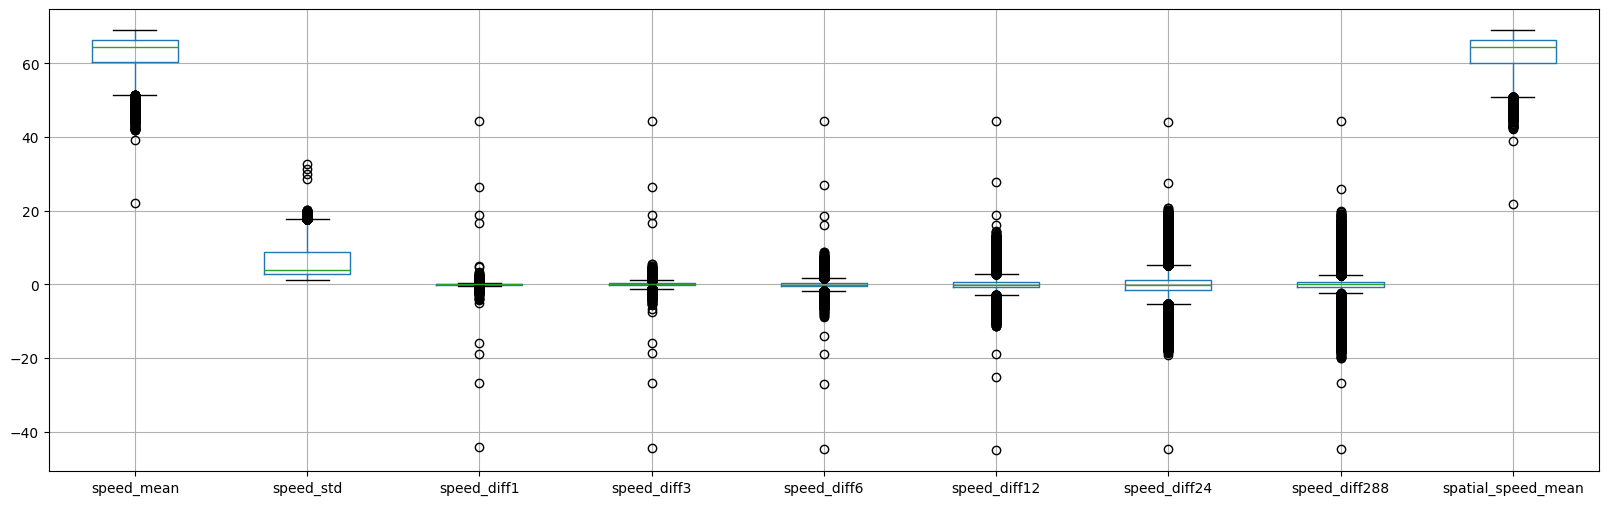

In [ ]:
pems_bay.iloc[288:, -9:].boxplot(figsize=(20, 6))

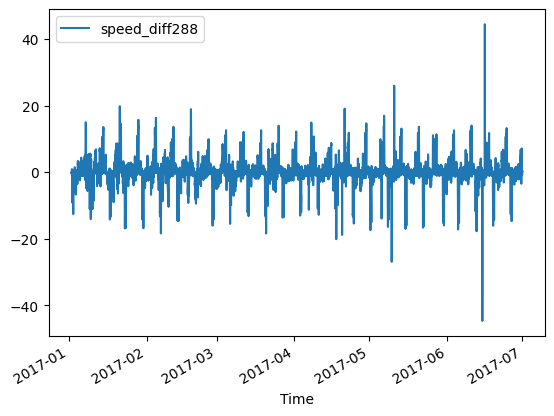

In [ ]:
# pems_bay['speed_diff1'].plot()
# pems_bay['speed_diff3'].plot()
# pems_bay['speed_diff6'].plot()
# pems_bay['speed_diff12'].plot()
# pems_bay['speed_diff24'].plot()
pems_bay['speed_diff288'].plot()
plt.legend()
plt.show()

# Load the data 


We load the data from main repository here 
https://github.com/GestaltCogTeam/BasicTS/tree/master/datasets

In [ ]:
import numpy as np
import pandas as pd
import torch

# # Загрузка данных
adj_df_path = 'data/pems_bay_adj_df.csv'
data_df_path = 'data/pems_bay_df.csv'

pems_bay_adj = pd.read_csv(adj_df_path)
pems_bay = pd.read_csv(data_df_path)

# Преобразование столбца Time в формат datetime
pems_bay["Time"] = pd.to_datetime(pems_bay.index)
pems_bay.set_index("Time", inplace=True)

# 1. Добавление временных признаков
L = 12
traffic_data = pems_bay.values  # Данные о трафике
pems_bay["weekday"] = pems_bay.index.weekday  # День недели
pems_bay["time_index"] = (pems_bay.index.hour * 12) + (pems_bay.index.minute // 5)  # Временные интервалы в течение дня
pems_bay["hour_sin"] = np.sin(2 * np.pi * pems_bay.index.hour / 24)  # Циклический час (синус)
pems_bay["hour_cos"] = np.cos(2 * np.pi * pems_bay.index.hour / 24)  # Циклический час (косинус)

# 2. Добавление статистических признаков на основе скоростей движения
speed_columns = pems_bay.columns[:traffic_data.shape[1]]  # Исключаем вновь добавленные столбцы
pems_bay["speed_mean"] = pems_bay[speed_columns].mean(axis=1)  # Среднее значение по строкам
pems_bay["speed_std"] = pems_bay[speed_columns].std(axis=1)  # Стандартное отклонение по строкам

# 3. Добавление скорости изменения (разности) скоростей движения
pems_bay["speed_diff1"] = pems_bay[speed_columns].diff(periods=1).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff3"] = pems_bay[speed_columns].diff(periods=3).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff6"] = pems_bay[speed_columns].diff(periods=6).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff12"] = pems_bay[speed_columns].diff(periods=12).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff24"] = pems_bay[speed_columns].diff(periods=24).mean(axis=1)  # Row-wise average difference
pems_bay["speed_diff288"] = pems_bay[speed_columns].diff(periods=288).mean(axis=1)  # Row-wise average difference


# 4. Добавление пространственно агрегированных признаков с использованием матрицы смежности
adj_matrix = pems_bay_adj.values  # Преобразование матрицы смежности в numpy array
speeds = pems_bay[speed_columns].values  # Извлечение значений скоростей как numpy array
spatial_avg = adj_matrix @ speeds.T / (adj_matrix.sum(axis=1)[:, None] + 1e-3)  # Взвешенное среднее с использованием матрицы смежности
pems_bay["spatial_speed_mean"] = spatial_avg.T.mean(axis=1)  # Среднее пространственное влияние по строкам

# Преобразование данных в тензор формата [B, L, N, C]
# Берем последние 12 временных шагов

weekday_data = pems_bay["weekday"].values[:, np.newaxis]  # День недели
time_index_data = pems_bay["time_index"].values[:, np.newaxis]  # Временной индекс
hour_sin_data = pems_bay["hour_sin"].values[:, np.newaxis]  # hour_sin
hour_cos_data = pems_bay["hour_cos"].values[:, np.newaxis]  # hour_cos
speed_mean_data = pems_bay["speed_mean"].values[:, np.newaxis]  # speed_mean
speed_std_data = pems_bay["speed_std"].values[:, np.newaxis]  # speed_std
speed_diff_data1 = pems_bay["speed_diff1"].values[:, np.newaxis]  # speed_diff
speed_diff_data3 = pems_bay["speed_diff3"].values[:, np.newaxis]  # speed_diff
speed_diff_data6 = pems_bay["speed_diff6"].values[:, np.newaxis]  # speed_diff
speed_diff_data12 = pems_bay["speed_diff12"].values[:, np.newaxis]  # speed_diff
speed_diff_data24 = pems_bay["speed_diff24"].values[:, np.newaxis]  # speed_diff
speed_diff_data288 = pems_bay["speed_diff288"].values[:, np.newaxis]  # speed_diff
spatial_speed_mean_data = pems_bay["spatial_speed_mean"].values[:, np.newaxis]  # spatial_speed_mean

# Преобразование данных в тензоры PyTorch
traffic_data = torch.tensor(traffic_data).float().unsqueeze(-1)  # [L, N, 1]
weekday_data = torch.tensor(weekday_data).float().unsqueeze(-1)  # [L, 1, 1]
time_index_data = torch.tensor(time_index_data).float().unsqueeze(-1)  # [L, 1, 1]
hour_sin_data = torch.tensor(hour_sin_data).float().unsqueeze(-1)  # [L, 1, 1]
hour_cos_data = torch.tensor(hour_cos_data).float().unsqueeze(-1)  # [L, 1, 1]
speed_mean_data = torch.tensor(speed_mean_data).float().unsqueeze(-1)  # [L, 1, 1]
speed_std_data = torch.tensor(speed_std_data).float().unsqueeze(-1)  # [L, 1, 1]
speed_diff_data1 = torch.tensor(speed_diff_data1).float().unsqueeze(-1)  # [L, 1, 1]
speed_diff_data3 = torch.tensor(speed_diff_data3).float().unsqueeze(-1)  # [L, 1, 1]
speed_diff_data6 = torch.tensor(speed_diff_data6).float().unsqueeze(-1)  # [L, 1, 1]
speed_diff_data12 = torch.tensor(speed_diff_data12).float().unsqueeze(-1)  # [L, 1, 1]
speed_diff_data24 = torch.tensor(speed_diff_data24).float().unsqueeze(-1)  # [L, 1, 1]
speed_diff_data288 = torch.tensor(speed_diff_data288).float().unsqueeze(-1)  # [L, 1, 1]
spatial_speed_mean_data = torch.tensor(spatial_speed_mean_data).float().unsqueeze(-1)  # [L, 1, 1]

# Расширение размерности N для всех признаков, чтобы они соответствовали traffic_data
weekday_data = weekday_data.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
time_index_data = time_index_data.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
hour_sin_data = hour_sin_data.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
hour_cos_data = hour_cos_data.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_mean_data = speed_mean_data.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_std_data = speed_std_data.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_diff_data1 = speed_diff_data1.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_diff_data3 = speed_diff_data3.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_diff_data6 = speed_diff_data6.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_diff_data12 = speed_diff_data12.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_diff_data24 = speed_diff_data24.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
speed_diff_data288 = speed_diff_data288.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]
spatial_speed_mean_data = spatial_speed_mean_data.expand(-1, traffic_data.size(1), -1)  # [L, N, 1]

# Объединение всех данных вдоль оси каналов C
combined_data_full = torch.cat([
    traffic_data,
    time_index_data,
    weekday_data,
    hour_sin_data,
    hour_cos_data,
    speed_mean_data,
    speed_std_data,
    speed_diff_data1,
    speed_diff_data3,
    speed_diff_data6,
    speed_diff_data12,
    speed_diff_data24,
    speed_diff_data288,
    spatial_speed_mean_data
], dim=-1)  # [L, N, C]

# Добавление размерности батча B (первая размерность)
combined_data_full = combined_data_full.unsqueeze(0)  # [1, L, N, C]

# Вывод результата
print(combined_data_full.shape)  # Ожидаемый формат: [B, L, N, C]


torch.Size([1, 52116, 325, 14])


In [ ]:
class convt(nn.Module):
    def __init__(self):
        super(convt, self).__init__()

    def forward(self, x, w):
        x = torch.einsum('bne, ek->bnk', (x, w))
        return x.contiguous()

class nconv(nn.Module):
    def __init__(self):
        super(nconv, self).__init__()

    def forward(self, x, A, dims):
        if dims == 2:
            x = torch.einsum('ncvl,vw->ncwl', (x, A))
        elif dims == 3:
            x = torch.einsum('ncvl,nvw->ncwl', (x, A))
        else:
            raise NotImplementedError('DFDGCN not implemented for A of dimension ' + str(dims))
        return x.contiguous()

class linear(nn.Module):
    """Linear layer."""

    def __init__(self, c_in, c_out):
        super(linear, self).__init__()
        self.mlp = torch.nn.Conv2d(c_in, c_out, kernel_size=(
            1, 1), padding=(0, 0), stride=(1, 1), bias=True)

    def forward(self, x):
        return self.mlp(x)

class gcn(nn.Module):
    """Graph convolution network."""

    def __init__(self, c_in, c_out, dropout, support_len=3, order=2):
        super(gcn, self).__init__()
        self.nconv = nconv()

        self.c_in = c_in
        c_in = (order * (support_len + 1) + 1) * self.c_in
        self.mlp = linear(c_in, c_out)
        self.dropout = dropout
        self.order = order

    def forward(self, x, support):

        out = [x]
        for a in support:
            x1 = self.nconv(x, a.to(x.device), a.dim())
            out.append(x1)

            for k in range(2, self.order + 1):
                x2 = self.nconv(x1, a.to(x1.device), a.dim())
                out.append(x2)
                x1 = x2
        h = torch.cat(out, dim=1)
        h = self.mlp(h)
        h = F.dropout(h, self.dropout, training=self.training)
        return h

def dy_mask_graph(adj, k):
    M = []
    for i in range(adj.size(0)):
        adp = adj[i]
        mask = torch.zeros( adj.size(1),adj.size(2)).to(adj.device)
        mask = mask.fill_(float("0"))
        s1, t1 = (adp + torch.rand_like(adp) * 0.01).topk(k, 1)
        mask = mask.scatter_(1, t1, s1.fill_(1))
        M.append(mask)
    mask = torch.stack(M,dim=0)
    adj = adj * mask
    return adj

def cat(x1,x2):
    M = []
    for i in range(x1.size(0)):
        x = x1[i]
        new_x = torch.cat([x,x2],dim=1)
        M.append(new_x)
    result = torch.stack(M,dim=0)
    return result


class DFDGCN(nn.Module):

    def __init__(self, num_nodes, dropout=0.3, supports=None,
                    gcn_bool=True, addaptadj=True, aptinit=None,
                    in_dim=2, out_dim=12, residual_channels=32,
                    dilation_channels=32, skip_channels=256, end_channels=512,
                    kernel_size=2, blocks=4, layers=2, a=1, seq_len=12, affine=True, fft_emb=10, identity_emb=10, hidden_emb=30, subgraph=20):
        super(DFDGCN, self).__init__()
        self.dropout = dropout
        self.blocks = blocks
        self.layers = layers
        self.gcn_bool = gcn_bool
        self.addaptadj = addaptadj
        self.filter_convs = nn.ModuleList()
        self.gate_convs = nn.ModuleList()
        self.residual_convs = nn.ModuleList()
        self.skip_convs = nn.ModuleList()
        self.bn = nn.ModuleList()
        self.gconv = nn.ModuleList()
        self.seq_len = seq_len
        self.a = a

        self.start_conv = nn.Conv2d(in_channels=in_dim,
                                    out_channels=residual_channels,
                                    kernel_size=(1, 1))

        self.supports = supports
        self.emb = fft_emb
        self.subgraph_size = subgraph
        self.identity_emb = identity_emb
        self.hidden_emb = hidden_emb
        self.fft_len = round(seq_len//2) + 1
        self.Ex1 = nn.Parameter(torch.randn(self.fft_len, self.emb), requires_grad=True)
        self.Wd = nn.Parameter(torch.randn(num_nodes,self.emb + self.identity_emb + self.seq_len * 2, self.hidden_emb), requires_grad=True)
        self.Wxabs = nn.Parameter(torch.randn(self.hidden_emb, self.hidden_emb), requires_grad=True)

        self.mlp = linear(residual_channels * 4,residual_channels)
        self.layersnorm = torch.nn.LayerNorm(normalized_shape=[num_nodes,self.hidden_emb], eps=1e-08,elementwise_affine=affine)
        self.convt = convt()

        self.node1 = nn.Parameter(
            torch.randn(num_nodes, self.identity_emb), requires_grad=True)
        self.drop = nn.Dropout(p=dropout)

        self.T_i_D_emb = nn.Parameter(
            torch.empty(288, self.seq_len))
        self.D_i_W_emb = nn.Parameter(
            torch.empty(7, self.seq_len))

        receptive_field = 1
        self.reset_parameter()
        self.supports_len = 0
        if not addaptadj:
            self.supports_len -= 1
        if supports is not None:
            self.supports_len += len(supports)
        if gcn_bool and addaptadj:
            if aptinit is None:
                if supports is None:
                    self.supports = []
                self.nodevec1 = nn.Parameter(
                    torch.randn(num_nodes, self.emb), requires_grad=True)
                self.nodevec2 = nn.Parameter(
                    torch.randn(self.emb, num_nodes), requires_grad=True)
                self.supports_len += 1
            else:
                if supports is None:
                    self.supports = []
                m, p, n = torch.svd(aptinit)
                initemb1 = torch.mm(m[:, :10], torch.diag(p[:10] ** 0.5))
                initemb2 = torch.mm(torch.diag(p[:10] ** 0.5), n[:, :10].t())
                self.nodevec1 = nn.Parameter(initemb1, requires_grad=True)
                self.nodevec2 = nn.Parameter(initemb2, requires_grad=True)
                self.supports_len += 1

        for b in range(blocks):
            additional_scope = kernel_size - 1
            new_dilation = 1
            for i in range(layers):
                # dilated convolutions
                self.filter_convs.append(nn.Conv2d(in_channels=residual_channels,
                                                   out_channels=dilation_channels,
                                                   kernel_size=(1, kernel_size), dilation=new_dilation))

                self.gate_convs.append(nn.Conv2d(in_channels=residual_channels,
                                                 out_channels=dilation_channels,
                                                 kernel_size=(1, kernel_size), dilation=new_dilation))

                # 1x1 convolution for residual connection
                self.residual_convs.append(nn.Conv2d(in_channels=dilation_channels,
                                                     out_channels=residual_channels,
                                                     kernel_size=(1, 1)))

                # 1x1 convolution for skip connection
                self.skip_convs.append(nn.Conv2d(in_channels=dilation_channels,
                                                 out_channels=skip_channels,
                                                 kernel_size=(1, 1)))
                self.bn.append(nn.BatchNorm2d(residual_channels))
                new_dilation *= 2
                receptive_field += additional_scope
                additional_scope *= 2
                if self.gcn_bool:
                    self.gconv.append(
                        gcn(dilation_channels, residual_channels, dropout, support_len=self.supports_len))
        self.end_conv_1 = nn.Conv2d(in_channels=skip_channels,
                                    out_channels=end_channels,
                                    kernel_size=(1, 1),
                                    bias=True)

        self.end_conv_2 = nn.Conv2d(in_channels=end_channels,
                                    out_channels=out_dim,
                                    kernel_size=(1, 1),
                                    bias=True)

        self.receptive_field = receptive_field

    def reset_parameter(self):
        nn.init.xavier_uniform_(self.T_i_D_emb)
        nn.init.xavier_uniform_(self.D_i_W_emb)


    def forward(self, history_data: torch.Tensor) -> torch.Tensor:
        """Feedforward function of DFDGCN; Based on Graph WaveNet

        Args:
            history_data (torch.Tensor): shape [B, L, N, C]

        Graphs:
            predefined graphs: two graphs; [2, N, N] : Pre-given graph structure, including in-degree and out-degree graphs

            self-adaptive graph: [N, N] : Self-Adaptively constructed graphs with two learnable parameters
                torch.mm(self.nodevec1, self.nodevec2)
                    nodevec: [N, Emb]

            dynamic frequency domain graph: [B, N, N] : Data-driven graphs constructed with frequency domain information from traffic data
                traffic_data : [B, N, L]
                frequency domain information : [B, N, L/2.round + 1] ------Embedding ------[B, N, Emb2]
                Identity embedding : learnable parameter [N, Emb3]
                Time embedding : Week and Day : [N, 7] [N, 24(hour) * 12 (60min / 5min due to sampling)] ------Embedding ------ [N, 2 * Emb4]
                Concat frequency domain information + Identity embedding + Time embedding ------Embedding , Activating, Normalization and Dropout
                Conv1d to get adjacency matrix

        Returns:
            torch.Tensor: [B, L, N, 1]
        """
        #num_feat = model_args["num_feat"]
        input = history_data.transpose(1, 3).contiguous()[:,:,:,:]

        data = history_data

        in_len = input.size(3)
        if in_len < self.receptive_field:
            x = nn.functional.pad(
                input, (self.receptive_field-in_len, 0, 0, 0))
        else:
            x = input
        x = self.start_conv(x)

        skip = 0
        if self.gcn_bool and self.addaptadj and self.supports is not None:


            gwadp = F.softmax(
                F.relu(torch.mm(self.nodevec1, self.nodevec2)), dim=1)

            new_supports = self.supports + [gwadp] # pretrained graph in DCRNN and self-adaptive graph in GWNet

            # Construction of dynamic frequency domain graph
            xn1 = input[:, 0, :, -self.seq_len:]

            # T_D = self.T_i_D_emb[(data[:, :, :, 1] * 288).type(torch.LongTensor)][:, -1, :, :]
            T_D = self.T_i_D_emb[(data[:, :, :, 1]).type(torch.LongTensor)][:, -1, :, :]
            D_W = self.D_i_W_emb[(data[:, :, :, 1 + 1]).type(torch.LongTensor)][:, -1, :, :]

            xn1 = torch.fft.rfft(xn1, dim=-1)
            xn1 = torch.abs(xn1)

            xn1 = torch.nn.functional.normalize(xn1, p=2.0, dim=1, eps=1e-12, out=None)
            xn1 = torch.nn.functional.normalize(xn1, p=2.0, dim=2, eps=1e-12, out=None) * self.a

            xn1 = torch.matmul(xn1, self.Ex1)
            xn1k = cat(xn1, self.node1)
            x_n1 = torch.cat([xn1k, T_D, D_W], dim=2)
            x1 = torch.bmm(x_n1.permute(1,0,2),self.Wd).permute(1,0,2)
            x1 = torch.relu(x1)
            x1k = self.layersnorm(x1)
            x1k = self.drop(x1k)
            adp = self.convt(x1k, self.Wxabs)
            adj = torch.bmm(adp, x1.permute(0, 2, 1))
            adp = torch.relu(adj)
            adp = dy_mask_graph(adp, self.subgraph_size)
            adp = F.softmax(adp, dim=2)
            new_supports = new_supports + [adp]

        # WaveNet layers
        for i in range(self.blocks * self.layers):

            # dilated convolution
            residual = x
            filter = self.filter_convs[i](residual)
            filter = torch.tanh(filter)
            gate = self.gate_convs[i](residual)
            gate = torch.sigmoid(gate)
            x = filter * gate

            # parametrized skip connection
            s = x
            s = self.skip_convs[i](s)
            try:
                skip = skip[:, :, :,  -s.size(3):]
            except:
                skip = 0
            skip = s + skip

            if self.gcn_bool and self.supports is not None:
                if self.addaptadj:
                    x = self.gconv[i](x, new_supports)

                else:
                    x = self.gconv[i](x, self.supports)
            else:
                x = self.residual_convs[i](x)
            x = x + residual[:, :, :, -x.size(3):]

            x = self.bn[i](x)

        x = F.relu(skip)
        x = F.relu(self.end_conv_1(x))
        x = self.end_conv_2(x)
        return x

# model = DFDGCN(num_nodes=pems_bay_adj.shape[0], supports=supports, in_dim=combined_data.shape[3])

# model(combined_data).shape

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim

from tqdm.notebook import tqdm

# Данные и параметры
combined_data = combined_data_full[:, 288:2016+288, :, :]
B, L, N, C = combined_data.shape  # [1, 52116, 325, 14]
batch_size = 16
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1
seq_len = 12  # Количество временных шагов на вход
pred_len = 1  # Количество временных шагов для предсказания

# Разделение данных на train, val и test
num_samples = combined_data.shape[1]
train_size = int(num_samples * train_ratio)
val_size = int(num_samples * val_ratio)
test_size = num_samples - train_size - val_size

train_data = combined_data[:, :train_size, :, :]
val_data = combined_data[:, train_size:train_size + val_size, :, :]
test_data = combined_data[:, train_size + val_size:, :, :]


# Создание кастомного Dataset
class TrafficDataset(Dataset):
    def __init__(self, data, seq_len, pred_len):
        super().__init__()
        self.data = data.squeeze(0)  # Убираем батч, форма [L, N, C]
        self.seq_len = seq_len
        self.pred_len = pred_len

    def __len__(self):
        return self.data.shape[0] - self.seq_len - self.pred_len + 1

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_len, :, :]  # Последовательность входных данных
        y = self.data[idx + self.seq_len:idx + self.seq_len + self.pred_len, :, 0]  # Целевая скорость
        return x, y


# Создание DataLoader
train_dataset = TrafficDataset(train_data, seq_len, pred_len)
val_dataset = TrafficDataset(val_data, seq_len, pred_len)
test_dataset = TrafficDataset(test_data, seq_len, pred_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Определение устройства
device = torch.device("cuda") if torch.cuda.is_available() else 'cpu'  # Устанавливаем CPU вместо CUDA
print(device)

# Обновление модели, данных и вычислений
supports = [torch.tensor(pems_bay_adj.to_numpy(), dtype=torch.float32)]
model = DFDGCN(num_nodes=N, supports=supports, in_dim=C, out_dim=pred_len).to(device)  # Модель на CPU
criterion = nn.MSELoss()  # Функция потерь
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

cpu


In [ ]:
# Тренировочный цикл
def train_model(model, train_loader, val_loader, epochs):
    best_val_loss = float('inf')

    for epoch in range(epochs):
        # Тренировка
        model.train()
        train_loss = 0.0
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs} - Training", leave=False)

        for x, y in train_loader_tqdm:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(x).squeeze(-1)  # Предсказание модели
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * x.size(0)

            # Отображение среднего лосса
            train_loader_tqdm.set_postfix({"Batch Loss": loss.item()})

        train_loss /= len(train_loader.dataset)

        # Валидация
        model.eval()
        val_loss = 0.0
        val_loader_tqdm = tqdm(val_loader, desc=f"Epoch {epoch + 1}/{epochs} - Validation", leave=False)

        with torch.no_grad():
            for x, y in val_loader_tqdm:
                x, y = x.to(device), y.to(device)
                output = model(x).squeeze(-1)
                loss = criterion(output, y)
                val_loss += loss.item() * x.size(0)

                # Отображение среднего лосса
                val_loader_tqdm.set_postfix({"Batch Loss": loss.item()})

        val_loss /= len(val_loader.dataset)

        # Сохранение лучшей модели
        # tqdm.write(f"Epoch {epoch + 1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pth")

# Тестирование
def test_model(model, test_loader):
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    test_loss = 0.0
    test_loader_tqdm = tqdm(test_loader, desc="Testing")

    with torch.no_grad():
        for x, y in test_loader_tqdm:
            x, y = x.to(device), y.to(device)
            output = model(x).squeeze(-1)
            loss = criterion(output, y)
            test_loss += loss.item() * x.size(0)

            # Отображение среднего лосса
            test_loader_tqdm.set_postfix({"Batch Loss": loss.item()})

    test_loss /= len(test_loader.dataset)
    tqdm.write(f"Test Loss: {test_loss:.4f}")

train_model(model, train_loader, val_loader, epochs=1)
test_model(model, test_loader)

Epoch 1/1 - Training:   0%|          | 0/88 [00:00<?, ?it/s]

Epoch 1/1 - Validation:   0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\romab\AppData\Local\Temp\ipykernel_10684\4143650647.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Testing:   0%|          | 0/12 [00:00<?, ?it/s]

Test Loss: 7.5325


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

import torch.nn as nn
import torch.optim as optim

from tqdm.notebook import tqdm

# Данные и параметры
combined_data = combined_data_full[:, 288:2016+288, :, :3]
B, L, N, C = combined_data.shape  # [1, 52116, 325, 3]
batch_size = 32
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1
seq_len = 12  # Количество временных шагов на вход
pred_len = 1  # Количество временных шагов для предсказания

# Разделение данных на train, val и test
num_samples = combined_data.shape[1]
train_size = int(num_samples * train_ratio)
val_size = int(num_samples * val_ratio)
test_size = num_samples - train_size - val_size

train_data = combined_data[:, :train_size, :, :]
val_data = combined_data[:, train_size:train_size + val_size, :, :]
test_data = combined_data[:, train_size + val_size:, :, :]


# Создание кастомного Dataset
class TrafficDataset(Dataset):
    def __init__(self, data, seq_len, pred_len):
        super().__init__()
        self.data = data.squeeze(0)  # Убираем батч, форма [L, N, C]
        self.seq_len = seq_len
        self.pred_len = pred_len

    def __len__(self):
        return self.data.shape[0] - self.seq_len - self.pred_len + 1

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_len, :, :]  # Последовательность входных данных
        y = self.data[idx + self.seq_len:idx + self.seq_len + self.pred_len, :, 0]  # Целевая скорость
        return x, y


# Создание DataLoader
train_dataset = TrafficDataset(train_data, seq_len, pred_len)
val_dataset = TrafficDataset(val_data, seq_len, pred_len)
test_dataset = TrafficDataset(test_data, seq_len, pred_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Определение устройства
device = torch.device("cuda")

# Обновление модели, данных и вычислений
supports = [torch.tensor(pems_bay_adj.to_numpy(), dtype=torch.float32)]
model = DFDGCN(num_nodes=N, supports=supports, in_dim=C, out_dim=pred_len).to(device)
criterion = nn.MSELoss()  # Функция потерь
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [ ]:
train_model(model, train_loader, val_loader, epochs=1)
test_model(model, test_loader)

Epoch 1/1 - Training:   0%|          | 0/176 [00:00<?, ?it/s]

Epoch 1/1 - Validation:   0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\Local\AppData\Local\Temp\ipykernel_9196\4143650647.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Testing:   0%|          | 0/25 [00:00<?, ?it/s]

Test Loss: 5.0635
